# XGBoost Notebook
------
We will use Social Network Ads dataset in this notebook to classify the product purchase using XGBoost algorithm from sklearn

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier as XGBoost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 1. Reading Data

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## 2. Data Split

In [4]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 2) (80, 2) (320,) (80,)


## 3. Normalize Data

In [20]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_test[0:5]

array([[ 0.29194447, -0.30471091],
       [ 0.19757858,  1.10461145],
       [-0.36861675,  1.33949851],
       [ 0.85813979,  2.19096411],
       [ 0.85813979, -0.56895885]])

## 4. Model Building, Training and Predicting

In [23]:
model = XGBoost()
print(model.get_params(), '\n\n')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 




## 5. Validation

In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56  1]
 [ 1 22]]


In [25]:
accuracy = (cm[0,0] + cm[1,1]) * 1.0 / (len(y_pred))
print("Accuracy = %.2f%%" % (accuracy * 100))

recall = cm[0,0] * 1.0 / (cm[0,0] + cm[0,1])
print("Recall = %.2f%%" % (recall * 100))

precision = cm[0,0] * 1.0 / (cm[0,0] + cm[1,0])
print("Precision = %.2f%%" % (precision * 100))

f1 = (2 * precision * recall) / (precision + recall)
print("F1 Score = %.2f%%" % (f1 * 100))

Accuracy = 97.50%
Recall = 98.25%
Precision = 98.25%
F1 Score = 98.25%


## 6. Visualizaion

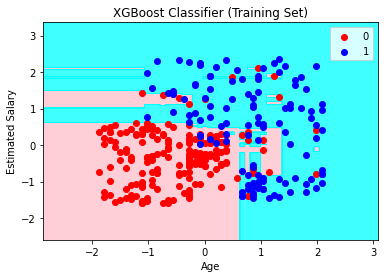

In [26]:
X_set, y_set = X_train, y_train

X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], color=ListedColormap(('red','blue'))(i) ,label= j)

plt.title('XGBoost Classifier (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

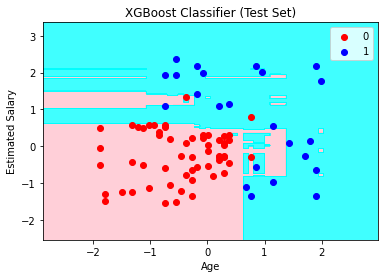

In [27]:
X_set, y_set = X_test, y_test

X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], color=ListedColormap(('red','blue'))(i) ,label= j)

plt.title('XGBoost Classifier (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()